In [20]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# -- make up some fake label
labels = np.array([0]*50 + [1]*50)
labels = labels[np.random.permutation(len(labels))]
labels

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1])

In [10]:
# -- make up some fake prediction, confidence scores
predictions = np.random.uniform(low=0.0001, high=1, size=(100))
predictions

array([ 0.70911904,  0.00818181,  0.05556885,  0.95703898,  0.31497714,
        0.8222746 ,  0.78476516,  0.31461968,  0.48482201,  0.74839875,
        0.07218083,  0.27335853,  0.96349515,  0.93393935,  0.34574999,
        0.22649789,  0.73388605,  0.61749319,  0.85076954,  0.3468791 ,
        0.14194534,  0.02363765,  0.11541794,  0.82213851,  0.91021441,
        0.05142369,  0.82217816,  0.73926291,  0.59523812,  0.85108119,
        0.93055643,  0.911537  ,  0.73117774,  0.71396457,  0.34378729,
        0.63272308,  0.04617121,  0.70419002,  0.32813239,  0.77881205,
        0.58711799,  0.70488492,  0.98465865,  0.06031734,  0.82184193,
        0.20234876,  0.39106381,  0.26892396,  0.70111213,  0.61289828,
        0.78507773,  0.30306349,  0.86509459,  0.21009403,  0.81208136,
        0.21726487,  0.25091859,  0.94424704,  0.63377231,  0.40735804,
        0.79119142,  0.75548535,  0.04542751,  0.70912367,  0.1716604 ,
        0.74655007,  0.71129844,  0.55012225,  0.86572788,  0.97

In [14]:
# -- compute precision, recall, and F1 at different threshold
# -- thresholds
threshold = np.linspace(0.0, 1.0, 101)
threshold

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [17]:
# -- score the different scores in their array (python list)
precision = []
recall = []
f1 = []

for t in threshold:
    temp_scores = []
    for p in predictions:
        if p > t:
            temp_scores.append(1) # prediction is greater then threshold, 1 one as true predicition
        else:
            temp_scores.append(0)
    
    # compute the metrics (using scikit-learn package "metrics")
    precision.append(metrics.precision_score(labels, temp_scores))
    recall.append(metrics.recall_score(labels, temp_scores))
    f1.append(metrics.f1_score(labels, temp_scores))

/Users/richardnam/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/richardnam/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


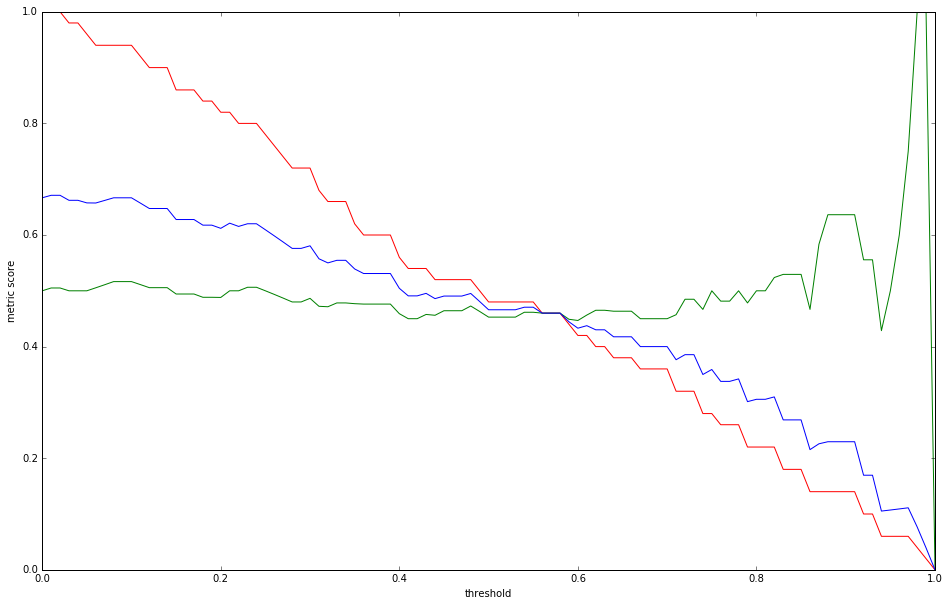

In [33]:
# -- plot it here using subplots
plt.figure(figsize=(16,10))

plt.plot(threshold, recall, color='red', label='recall')
plt.plot(threshold, precision, color='green', label='precision')
plt.plot(threshold, f1, color='blue', label='f1')

plt.xlabel('threshold')
plt.ylabel('metric score')

plt.lenge